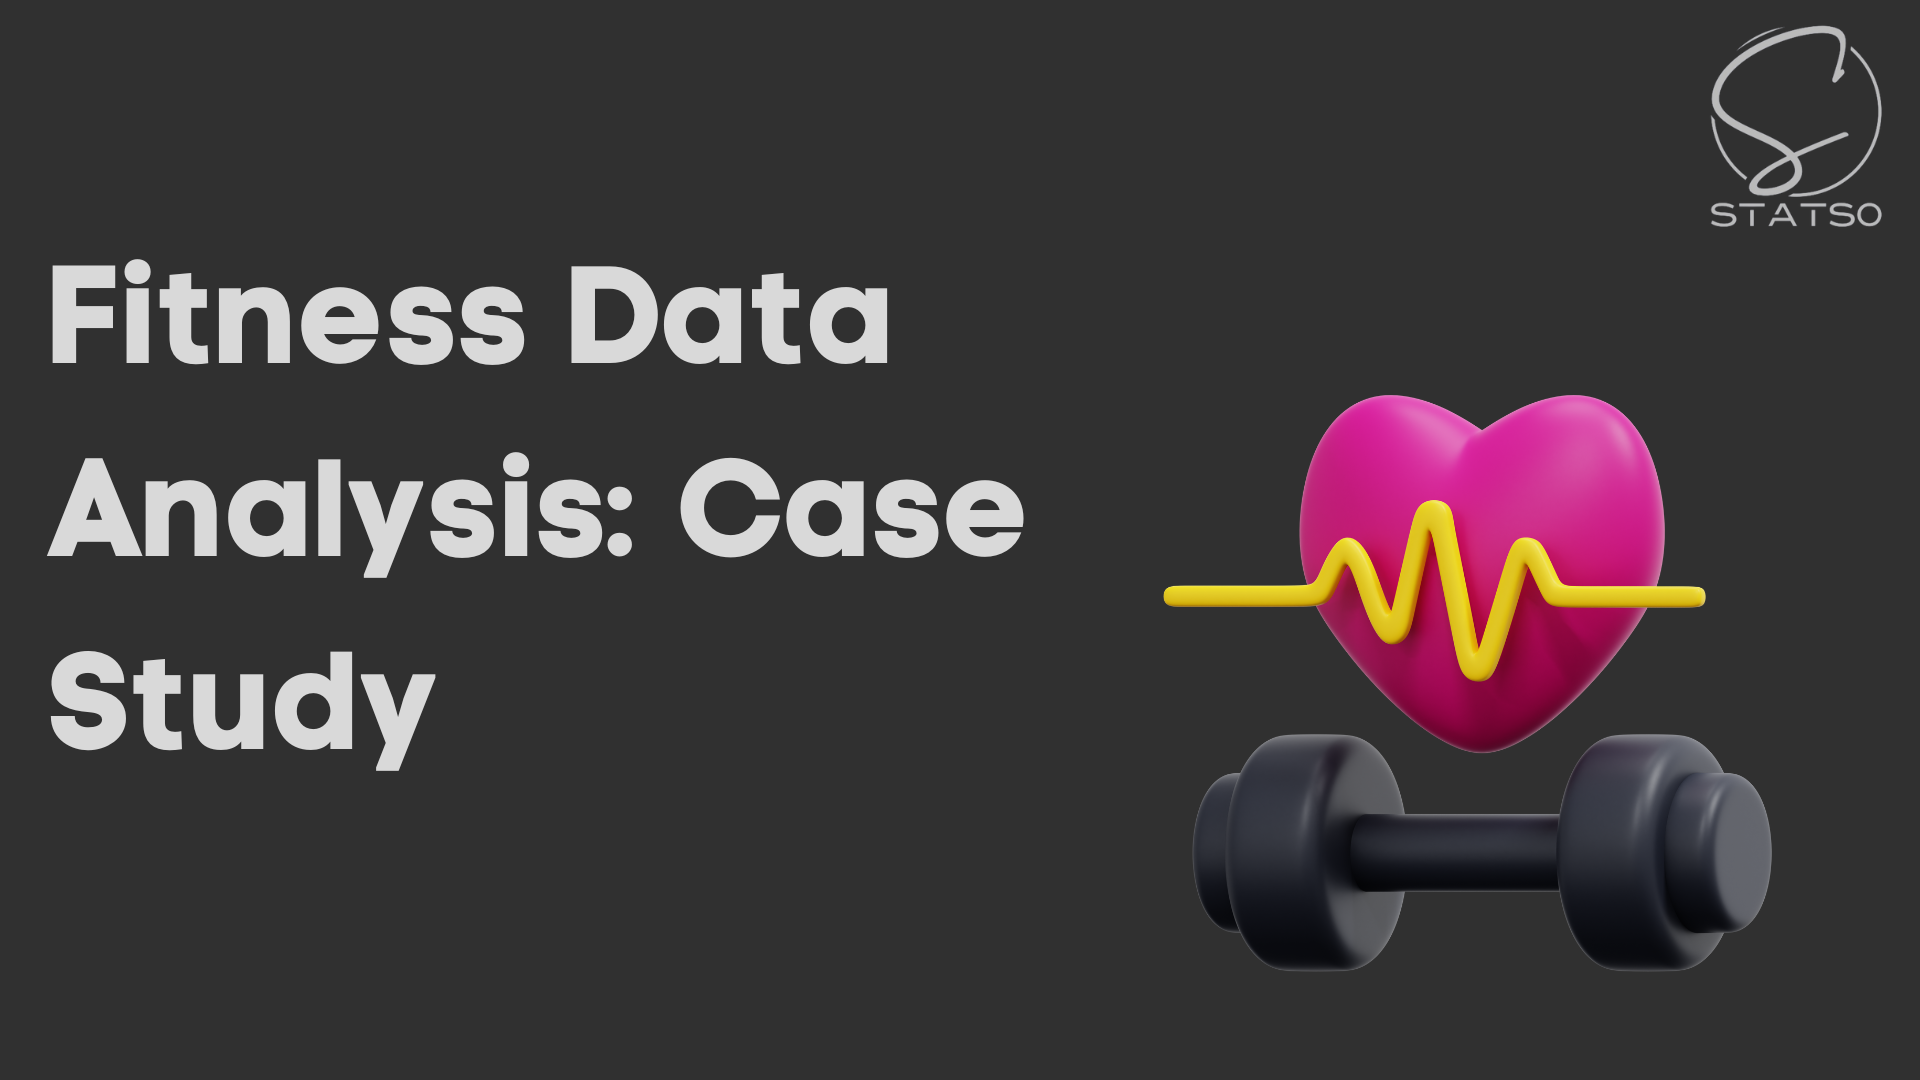

# Project Proposal
    
    Created By-:
        Med Tour Easy

# Project Description

With the explosion in fitness tracker popularity, runners all of the world are collecting data withgadgets (smartphones, watches, etc.) to keep themselves motivated. They look for answers to questions like:

•How fast, long, and intense was my run today?

•Have I succeeded with my training goals?

•Am I progressing?

•What were my best achievements?

•How do I perform compared to others?


This data was exported from Runkeeper. The data is a CSV file where each row is a single trainingactivity. In this project, you'll create import, clean, and analyze my data to answer the abovequestions. You can then apply the same strategy to your training data if you wish!

# Project Tasks

•1. Obtain and review raw data

•2. Data preprocessing

•3. Dealing with missing values

•4. Plot running data

•5. Running statistics

•6. Visualization with averages

•7. Did I reach my goals?

•8. Am I progressing?

•9. Training intensity

•10. Detailed summary report

•11. Fun facts



# Task 1

##  Obtain and review raw data
<p>One day, my old running friend and I were chatting about our running styles, training habits, and achievements, when I suddenly realized that I could take an in-depth analytical look at my training. I have been using a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and decided it was time to analyze my running data to see how I was doing.</p>
<p>Since 2012, I've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>

In [1]:
#Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create DataFrame with parse_dates and index_col parameters 
a= pd.read_csv("cardioActivities.csv",parse_dates=["Date"],index_col="Date")

#making a copy for the data frame
df_activities = a.copy()

# First look at exported data: select sample of 3 random rows
display(df_activities.sample(3))

# Print DataFrame summary
print(df_activities.info())


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2013-07-01 07:09:00,fbd264b0-ca3a-4af0-97a8-36ef4fd84db7,Running,NaN,3.75,21:10,5:39,10.63,262.0,0,NaN,NaN,NaN,NaN
2013-06-08 07:45:08,b144b295-a4a7-4065-b9f1-0cf24dcf378e,Running,NaN,6.35,33:51,5:20,11.24,455.0,36,NaN,NaN,NaN,2013-06-08-074508.gpx
2015-04-13 16:57:26,f1b5dd21-9053-4340-b265-a074659a5dfe,Running,NaN,18.06,1:53:38,6:17,9.54,1240.0,228,140.0,NaN,NaN,2015-04-13-165726.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

# Task 2

##  Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that I sometimes left blank. Also, I only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [3]:
# Define list of columns to be deleted
col_to_drop=["Route Name","Friend's Tagged","Notes","GPX File","Activity Id","Calories Burned"]
df_activities.drop(columns=col_to_drop, inplace=True)

# Count types of training activities
display(df_activities['Type'].value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities["Type"]=df_activities["Type"].str.replace("Other","Unicycling")

# Count missing values for each column
df_activities.isnull().sum()


Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

# Task 3

##  Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [4]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities["Type"]=="Running"]["Average Heart Rate (bpm)"].mean()
avg_hr_cycle = df_activities[df_activities["Type"]=="Cycling"]["Average Heart Rate (bpm)"].mean()


# avg_hr_walk=df_activities[df_activities["Type"]=="Walking"]["Average Heart Rate (bpm)"].mean()
#Since all the values are null values or missing values hence mean will be nan. 
#Hence taking a approximate value as per the other mean of running and cycling = 110


# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle= df_activities[df_activities['Type'] == 'Cycling'].copy()


# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)


# Count missing values for each column in running data
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# Task 4

##  Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

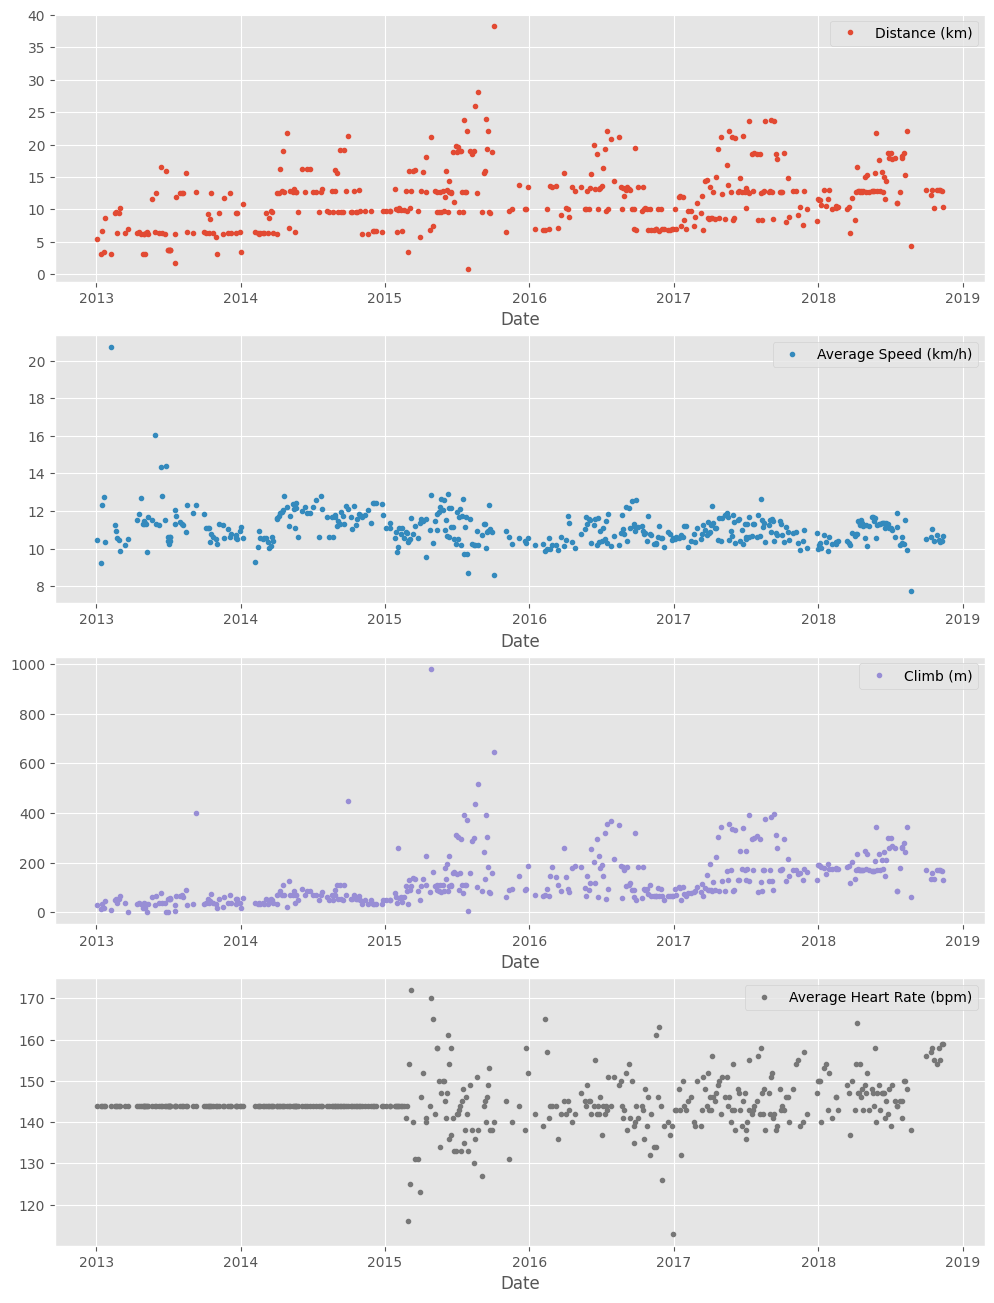

In [5]:
import warnings


# Convert the 'Date' index to datetime format
df_run.index = pd.to_datetime(df_run.index)

# Subset the data for the years 2013 through 2018
runs_subset_2013_2018 = df_run[(df_run.index.year >= 2013) & (df_run.index.year <= 2018)]

# Ensure the data is sorted with the most recent records first
runs_subset_2013_2018 = runs_subset_2013_2018.sort_index(ascending=False)

# Plotting
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12, 16),
                           linestyle='none',
                           marker='o',
                           markersize=3)

# Show the plot
plt.show()


# Task 5

##  Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [6]:
#Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run[(df_run.index.year >= 2015) & (df_run.index.year <= 2018)]

# Calculate annual statistics
annual_stats = runs_subset_2015_2018.resample("A").mean()
print('How my average run looks in the last 4 years:')
display(annual_stats)
print("\n")

# Calculate weekly statistics
weekly_stats = runs_subset_2015_2018.resample("W").mean()
print('Weekly averages of the last 4 years:')
display(weekly_stats)
print("\n")


#Mean weekly counts
weekly_counts_average = runs_subset_2015_2018.resample("W").count().mean()["Distance (km)"]
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in the last 4 years:


C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\351806613.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_stats = runs_subset_2015_2018.resample("A").mean()


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000




Weekly averages of the last 4 years:


C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\351806613.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_stats = runs_subset_2015_2018.resample("W").mean()


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0




How many trainings per week I had on average: 1.5


# Task 6

##  Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\2929122523.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018 = df_run['2015':'2018']


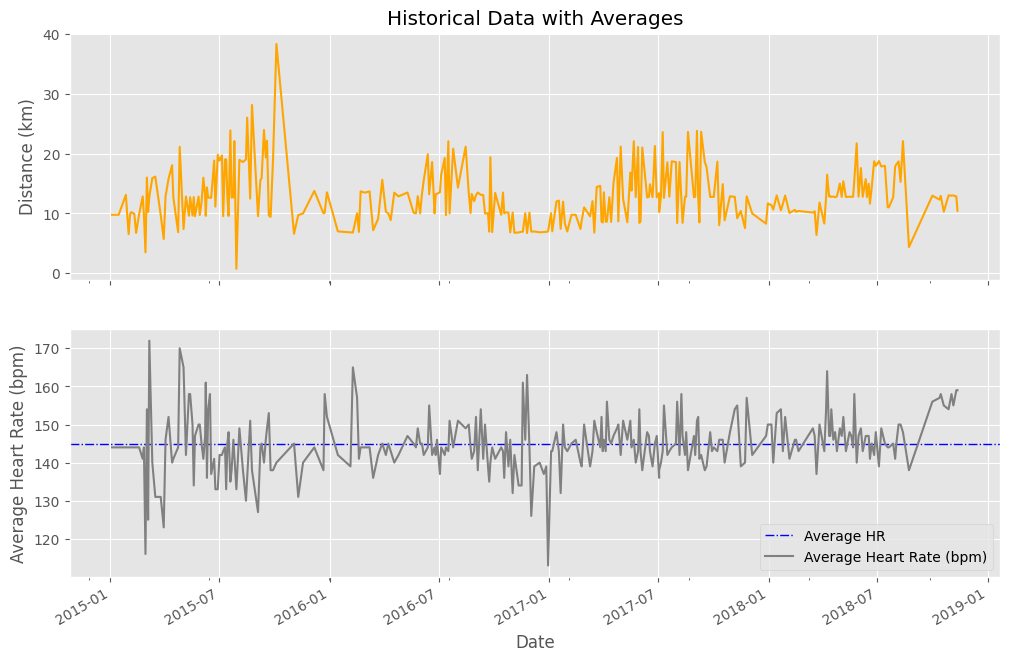

In [7]:
# Prepare data
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot and customize the first subplot (Distance)
runs_distance.plot(ax=ax1, color='orange')
ax1.set(ylabel='Distance (km)', title='Historical Data with Averages')

# Plot and customize the second subplot (Heart Rate)
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.', label='Average HR')
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')

# Adding legend for the horizontal line
ax2.legend()

# Show plot
plt.show()


# Task 7

##  Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\415697496.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_run_dist_annual = df_run['2013':'2018']['Distance (km)'].resample('A').sum()


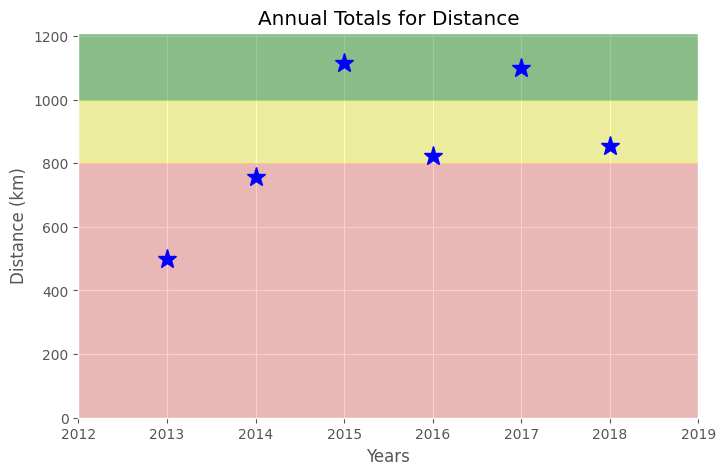

In [8]:
# Prepare data
df_run_dist_annual = df_run['2013':'2018']['Distance (km)'].resample('A').sum()

# Create plot
fig = plt.figure(figsize=(8.0, 5.0))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue', ax=plt.gca())
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual Totals for Distance')

# Add horizontal spans
ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)  # Adding horizontal span from 0 to 800 km

# Show plot
plt.show()


# Task 8

## Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\3688287210.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_run_dist_wkly = df_run['2013':'2018']['Distance (km)'].resample('W').sum().fillna(method='bfill')


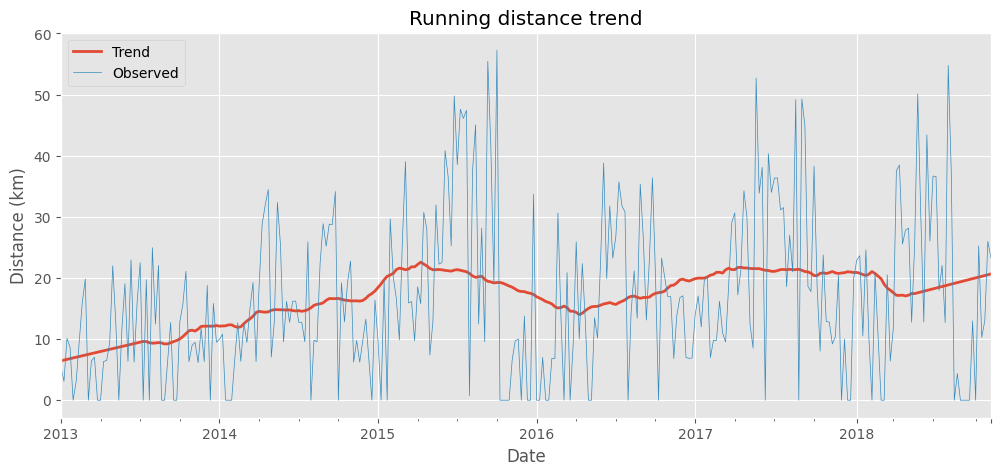

In [9]:
#!pip install statsmodels
import statsmodels.api as sm

# Prepare data
df_run_dist_wkly = df_run['2013':'2018']['Distance (km)'].resample('W').sum().fillna(method='bfill')

# Decompose the time series
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)

# Create plot
fig = plt.figure(figsize=(12, 5))

# Plot observed and trend
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)
# Customize plot
plt.title('Observed Distance of Runs and Decomposed Trend')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.legend()

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()


# Task 9

##  Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\3139569142.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']


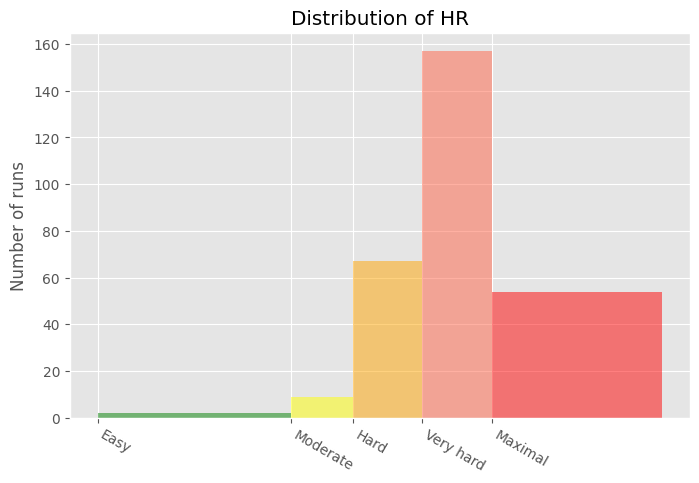

In [10]:

# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2015-03':'2018']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot histogram and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(len(patches)):
    patches[i].set_facecolor(zone_colors[i])

# Customize x-axis
ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.set_xticks(hr_zones[:-1])  # Exclude the last tick to match the number of labels
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Show plot
plt.show()


# Task 10

##  Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [11]:
df_run_walk_cycle = df_run.append([df_walk,df_cycle]).sort_index(ascending=False)


dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals= df_run_walk_cycle.groupby(by="Type")[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)


# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[(i, 'total')] = df_totals[i]

# Reshaping summary for better readability
df_summary_stacked = df_summary.stack()

print('Summary statistics for different training types:')
display(df_summary_stacked)

Totals for different training types:


C:\Users\ricky\AppData\Local\Temp\ipykernel_1952\3517403236.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append([df_walk,df_cycle]).sort_index(ascending=False)


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

# Task 11

##  Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [12]:
# Fun facts data
my_total_distance = 5224  # Total km run by me
my_total_shoes = 7        # Total shoes  used by me
forrest_total_distance = 24700  # Total km run by Forrest Gump

# Step 1: Calculate average shoes lifetime (distance per pair)
average_shoes_lifetime = my_total_distance / my_total_shoes

# Step 2: Calculate the number of shoes Forrest would need for his run
shoes_for_forrest_run = forrest_total_distance / average_shoes_lifetime

# Print the result
print(f'Forrest Gump would need approximately {round(shoes_for_forrest_run)} pairs of shoes!')


Forrest Gump would need approximately 33 pairs of shoes!


# Conclusions:

**Heart Rate Distribution in Running**:

    The histogram analysis of the heart rate during running sessions reveals that most runs fall within moderate to hard intensity zones, with heart rates between 125 to 151 bpm. This indicates that the majority of runs are of moderate to high intensity, suggesting a consistent effort in cardiovascular training.


**Yearly and Weekly Running Performance**: 


    The annual and weekly analysis of running data from 2013 to 2018 shows fluctuations in performance, with certain years displaying higher totals in distance and climb metrics. The trend analysis indicates that the running distance has seen variations over time, possibly due to changes in training intensity or goals.


**Cross-Activity Analysis**: 


    By combining running, walking, and cycling data, it was found that running contributes the most in terms of total distance and climb. Cycling comes second, and walking, while contributing less to overall distance and climb, still plays a significant role in the overall training regime.


**Historical Trends and Seasonal Patterns**: 

    The time-series decomposition of weekly running distances reveals clear seasonal patterns and trends. This indicates that there may be periods of the year where running activity is more intense, possibly aligning with training cycles or specific fitness goals.


**Comparison with Forrest Gump**: 

    Based on the fun fact calculation, Forrest Gump, who ran 24,700 km, would require a significantly higher number of running shoes compared to the average runner, emphasizing the immense scale of his fictional running journey. This comparison provides a light-hearted perspective on the sustainability and wear-and-tear associated with long-term running.